## Problem 1: What variables/ statistics are most effective in determining whether a player is an All-Star and, is it possible to create a model using this information and predict All-Stars for a different season?

Every year, the National Basketball Association (NBA) holds an All-Star game. This game is an exhibition that showcases the top 24 of the league's best players in that season.

Therefore, my aim in this is to check whether I am able to successsfully predict the all-stars for the current NBA season.

I will be doing this by creating a model using player stats of past seasons. Through this model, I can determine what player statistics are important to determine whether or not they become an all-star.

Furthermore, by using this model, I can predict, as accurately as possible, the NBA all-stars for the 2020-2021 season.

# Variables Used

1. TRB = Total Rebounds obtained by the Player
2. AST = Total Assists made by the player
3. PTS = Total Points scored by the player
4. All-Star = Shows whether the player is an all-star or not
5. WS = Win Share (measure of how many wins the player is responsible for on his team)
6. FG = Total Field Goals made by the player
7. FGA = Field goals attempted by the player
8. 3P = 3 pointers made by the player
9. 3PA = 3 pointers attempted by the player
10. 2P = 2 pointers made by the player
11. 2PA = 2 pointers attempted by the player
12. FT = Free throws made by the player
13. STL = Total Steals made by the player
14. BLK = Total Blocks made by the player
15. USG% = percentage of team plays the player was involved in

# Steps taken to Predict the All-Stars 

1. Loading Datasets and Creating DataFrames

2. Visualizing Data to see Average Stats of Players throughout the League

3. Differentiating between All-Stars and Non All-Stars


4. Finding the biggest factor in determining an All-Star

5. Building Model 1 using Random Forest
- Creating Train-Test Split
- Checking how accurate the model is
    
6. Building Model 2 using Random Forest

- Finding best columns to use for model
- Displaying HeatMap and show variables that have the high correlation with All-Star
- Creating new dataframe with these columns
- Creating Train-Test Split
- Checking how accurate the model is
    
7. Loading 2020-2021 NBA Player Stats and Creating Dataframe

8. Combining it with either Model 1 or Model 2 (depending on accuracy of model) to predict All-Stars for the season

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


# Loading Data and Creating a DataFrame

First, I will load a dataset that contains the statistics of players from past seasons (2016-2019). This data will help in the creation of my model

In [3]:
playerdata = pd.read_csv('currentplayerstats.csv')
playerdata.head(10)

,Season,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,BLK,TOV,PF,PTS,PER,TS%,USG%,WS,BPM,All-Star
0,2016,Álex Abrines,SG,23,OKC,68,6,15.5,2.0,5.0,...,0.1,0.5,1.7,6.0,10.1,0.560,15.9,2.1,-1.6,0
1,2016,Quincy Acy,PF,26,DAL,6,0,8.0,0.8,2.8,...,0.0,0.3,1.5,2.2,-1.4,0.355,20.0,-0.1,-14.3,0
2,2016,Quincy Acy,PF,26,BRK,32,1,15.9,2.0,4.8,...,0.5,0.6,1.8,6.5,13.1,0.587,16.5,1.1,-0.9,0
3,2016,Steven Adams,C,23,OKC,80,80,29.9,4.7,8.2,...,1.0,1.8,2.4,11.3,16.5,0.589,16.2,6.5,-0.2,0
4,2016,Arron Afflalo,SG,31,SAC,61,45,25.9,3.0,6.9,...,0.1,0.7,1.7,8.4,8.9,0.559,14.4,1.4,-3.6,0
5,2016,Alexis Ajinça,C,28,NOP,39,15,15.0,2.3,4.6,...,0.6,0.8,2.0,5.3,12.9,0.529,17.2,1.0,-3.3,0
6,2016,Cole Aldrich,C,28,MIN,62,0,8.6,0.7,1.4,...,0.4,0.3,1.4,1.7,12.7,0.549,9.4,1.3,-0.8,0
7,2016,LaMarcus Aldridge,PF,31,SAS,72,72,32.4,6.9,14.6,...,1.2,1.4,2.2,17.3,18.6,0.532,24.5,7.2,0.8,0
8,2016,Lavoy Allen,PF,27,IND,61,5,14.3,1.3,2.8,...,0.4,0.5,1.3,2.9,11.6,0.485,10.9,1.7,-1.7,0
9,2016,Tony Allen,SG,35,MEM,71,66,27.0,3.9,8.4,...,0.4,1.4,2.5,9.1,13.3,0.493,17.9,3.1,-1.0,0


# Visualizing data to see the average stats of players throughout the league

count    2360.000000
mean        3.489068
std         2.459760
min         0.000000
25%         1.800000
50%         3.000000
75%         4.600000
max        16.000000
Name: TRB, dtype: float64


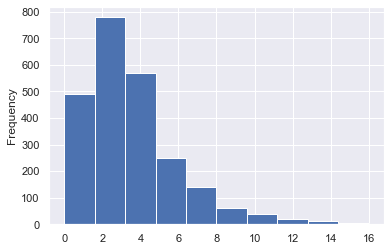

In [4]:
#Visualizing average rebounds, assists and points of players throughout the seasons


rebounds = playerdata["TRB"]
assists = playerdata["AST"]
totalpoints = playerdata["PTS"]


rebounds.plot(kind="hist")
print(rebounds.describe())

The above diagram shows that majority of the players in the league got atleast 3 rebounds per game

count    2360.000000
mean        1.822331
std         1.716730
min         0.000000
25%         0.700000
50%         1.300000
75%         2.400000
max        11.200000
Name: AST, dtype: float64


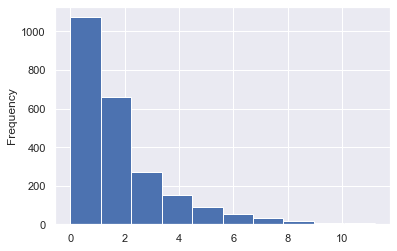

In [5]:
assists.plot(kind = "hist")
print(assists.describe())

The above diagram shows that majority of the players in the league got between 1-2 assist per game.

count    2360.000000
mean        8.313644
std         6.042272
min         0.000000
25%         3.900000
50%         6.800000
75%        11.500000
max        36.100000
Name: PTS, dtype: float64


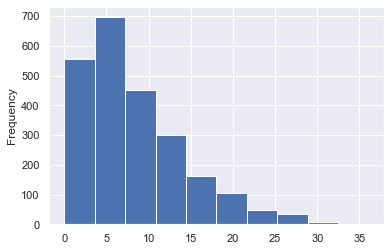

In [6]:
totalpoints.plot(kind = "hist")

print(totalpoints.describe())

From the above diagram, we can see that on average, most players score 8 points per game

# Visualizing the Difference between All-Stars and Non All-Stars

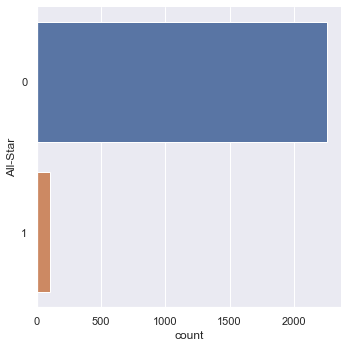

In [7]:
#Showing the number of all-stars in comparison to non-all stars

sb.catplot(y = "All-Star", data = playerdata, kind = "count")

This diagram shows that only a small number of players are chosen to be all-stars. Therefore, to be chosen, they must exhibit above average - exceptional performances during the games played.

In [8]:
#Converting the int values in the All-Star column to float values so that it can be compared with other columns

playerdata['All-Star'] = playerdata['All-Star'].astype(float)

#Creating Dataframes for All-Stars and Non All-Stars

allstar = playerdata['All-Star']

allstar.head

<bound method NDFrame.head of 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2355    1.0
2356    0.0
2357    0.0
2358    0.0
2359    0.0
Name: All-Star, Length: 2360, dtype: float64>

As mentioned before, for a player to become an all-star, they must exhibit superstar qualities. This means that they should acheive above average results in assists, rebounds, total points and win shares (refers to the number of wins a player is responsible for on his team)

Therefore, now, we will visualize the differences between all-stars and non all-stars in these categories

<AxesSubplot:xlabel='All-Star', ylabel='PTS'>

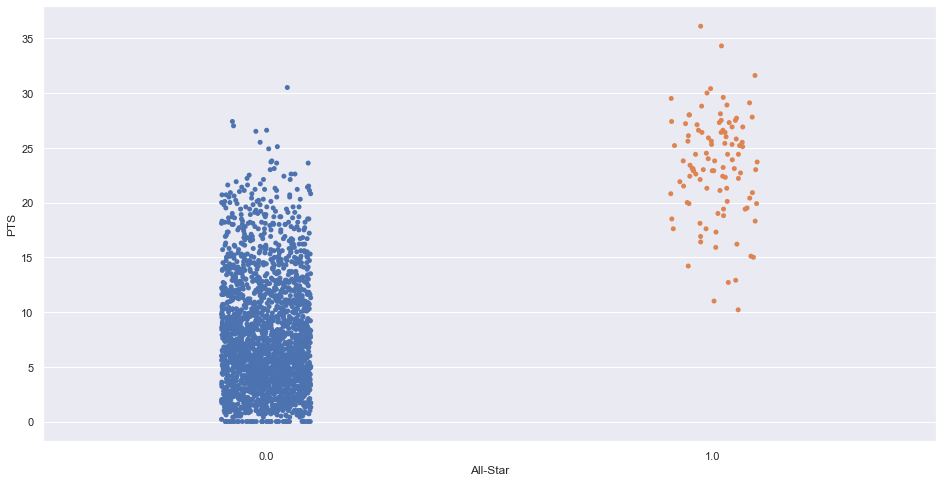

In [9]:
#Difference in Total Points scored between All-Stars and Non All-Stars

f = plt.figure(figsize = (16,8))
sb.stripplot (x = 'All-Star', y = 'PTS', data = playerdata)

As seen in the above diagram, all-stars (which are depicted by 1.0) score considerably higher amount of points than those not selected to be an all-star. But however, we can still see some outliers such as those that score 10-15 points per game. 

The question is now - If it is not total points, what did they do that made them an all-star? Are there other factors?

Therefore, to answer this, we shall look at assists, rebounds and win shares

<AxesSubplot:xlabel='All-Star', ylabel='AST'>

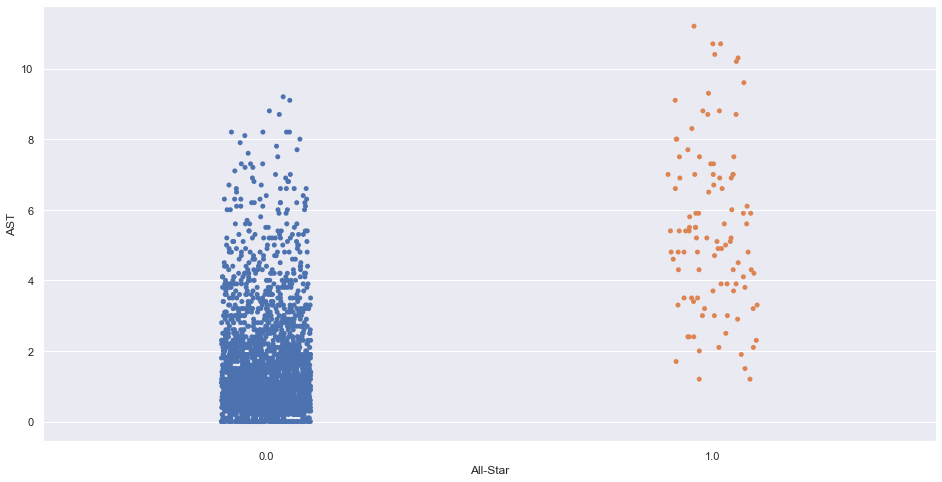

In [10]:
# Difference in assists made between All-Stars and Non All-Stars

f = plt.figure(figsize = (16,8))
sb.stripplot (x = 'All-Star', y = 'AST', data = playerdata)

As shown in the above diagram, it is clear that majority of the league make between 0-2 assists per game. Most of the All-Stars on the other hand, make atleast 4 and above per game. 

<AxesSubplot:xlabel='All-Star', ylabel='TRB'>

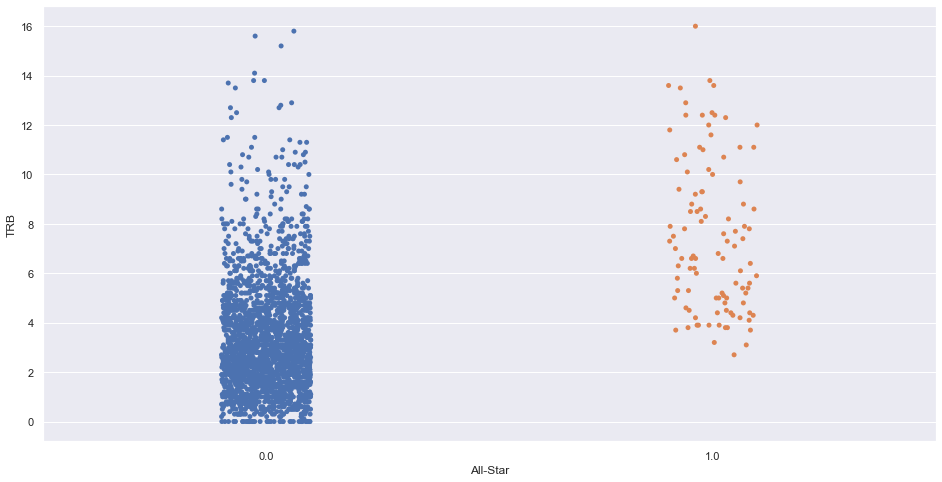

In [11]:
# Difference in rebounds made between All-Stars and Non All-Stars

f = plt.figure(figsize = (16,8))
sb.stripplot (x = 'All-Star', y = 'TRB', data = playerdata)

As shown in the above diagram, it is clear that majority of the league make between 0-6 rebounds per game. The All-Stars on the other hand, make atleast 6 and above per game with only a few making less than that.

<AxesSubplot:xlabel='All-Star', ylabel='WS'>

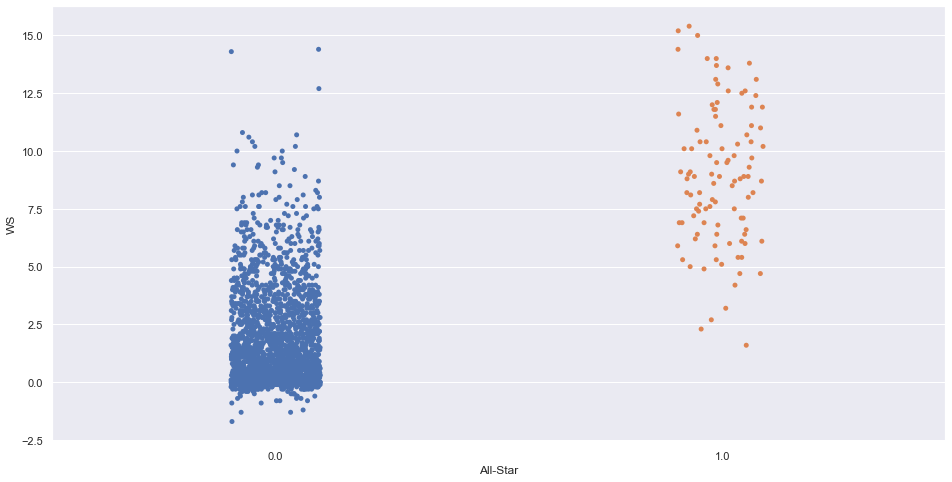

In [12]:
# Difference in win shares made between All-Stars and Non All-Stars

f = plt.figure(figsize = (16,8))
sb.stripplot (x = 'All-Star', y = 'WS', data = playerdata)

As shown in the above diagram, it is evident that all-star leave a more lasting impact on the team's performance as their win share is much higher than the league's average of between 0.0-2.5.

But, from analyzing these things, we can only see how much better All-Stars are than the other regular NBA players. Now, we shall find out the most determining factor for a player to become an all-star. Is it PTS, AST, TRB or WS

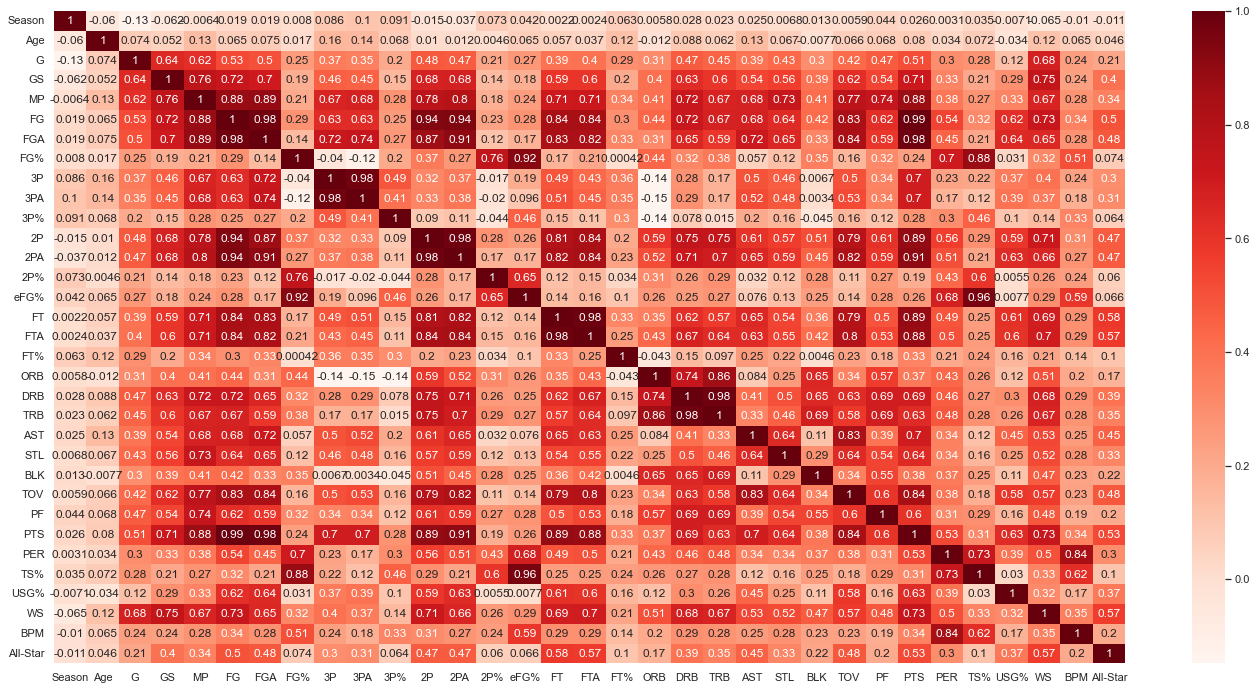

In [13]:
#Creating a heatmap to display correlations

plt.figure(figsize = (24,12))

cor = playerdata.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show()

In [14]:
cor_target = abs(cor['All-Star'])

relevant_features = cor_target[cor_target>0.3]
relevant_features1 = cor_target[cor_target>0.5]

print(relevant_features.head, '\n')
print(relevant_features1.head)

<bound method NDFrame.head of GS          0.397897
MP          0.344354
FG          0.499682
FGA         0.482143
3P          0.302392
3PA         0.306670
2P          0.473187
2PA         0.467463
FT          0.582824
FTA         0.570977
DRB         0.391594
TRB         0.347066
AST         0.449640
STL         0.328841
TOV         0.483782
PTS         0.527794
USG%        0.372814
WS          0.568998
All-Star    1.000000
Name: All-Star, dtype: float64> 

<bound method NDFrame.head of FT          0.582824
FTA         0.570977
PTS         0.527794
WS          0.568998
All-Star    1.000000
Name: All-Star, dtype: float64>


As seen in the above diagram and table, out of the 36 columns in the dataset, only 14 columns have a correlation with All-Stars above 0.3 and only 3 columns have a correlation with All-Star above 0.5.

This implies that the 14 columns are moderate factors that needs to be taken into consideration when determining whether a player is an All-Star or not. 
AST and TRB are part of this 14 columns and they have a correlation of 0.449 and 0.347 respectively. 

The other 3 columns on the other hand, are stronger factors that can help us determine all-stars. These are Win Shares, Total Points scored by the player and Free Throws Attempted, each having a correlation of 0.568, 0.5277, and 0.571 respectively.

Therefore, out of the Variables taken into consideration, Win Shares is the most effective and thus, implies that the higher the Win Share, the more probable for a player becoming an All-Star


# Building Model 1 Using Random Forest

In [15]:
#Cleaning Data
playerdata.fillna(0, inplace = True)

#Dropping irrelevant columns to help us predict All-Star
newplayerdata = playerdata.drop(['Player', 'Pos', 'Tm','Season', 'Age', 'G', 'GS', 'All-Star'], axis = 1)
print(newplayerdata.head())

     MP   FG  FGA    FG%   3P  3PA    3P%   2P  2PA    2P%  ...  STL  BLK  \
0  15.5  2.0  5.0  0.393  1.4  3.6  0.381  0.6  1.4  0.426  ...  0.5  0.1   
1   8.0  0.8  2.8  0.294  0.2  1.2  0.143  0.7  1.7  0.400  ...  0.0  0.0   
2  15.9  2.0  4.8  0.425  1.1  2.6  0.434  0.9  2.2  0.414  ...  0.4  0.5   
3  29.9  4.7  8.2  0.571  0.0  0.0  0.000  4.7  8.2  0.572  ...  1.1  1.0   
4  25.9  3.0  6.9  0.440  1.0  2.5  0.411  2.0  4.4  0.457  ...  0.3  0.1   

   TOV   PF   PTS   PER    TS%  USG%   WS   BPM  
0  0.5  1.7   6.0  10.1  0.560  15.9  2.1  -1.6  
1  0.3  1.5   2.2  -1.4  0.355  20.0 -0.1 -14.3  
2  0.6  1.8   6.5  13.1  0.587  16.5  1.1  -0.9  
3  1.8  2.4  11.3  16.5  0.589  16.2  6.5  -0.2  
4  0.7  1.7   8.4   8.9  0.559  14.4  1.4  -3.6  

[5 rows x 28 columns]


# Creating Train and Test Split

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(newplayerdata, allstar, test_size = 0.2, random_state = 42)

In [17]:
print('Training newplayerdata Shape:', xtrain.shape)
print('Training allstar Shape:', ytrain.shape)
print('Testing newplayerdata Shape:', xtest.shape)
print('Testing allstar Shape:', ytest.shape)

Training newplayerdata Shape: (1888, 28)
Training allstar Shape: (1888,)
Testing newplayerdata Shape: (472, 28)
Testing allstar Shape: (472,)


In [18]:
rf = RandomForestClassifier(n_estimators = 100)

rf.fit(xtrain, ytrain)

RandomForestClassifier()

In [19]:
rfc_pred = rf.predict(xtest)
rfc_prediction = rf.predict(xtrain)

# Checking the Accuracy of the Model

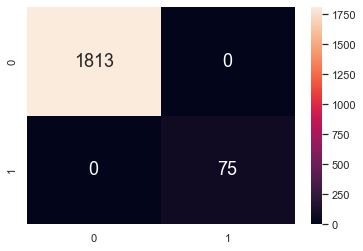

In [24]:
#showing the confusion matrix for train and test data

#train data

x = sb.heatmap(confusion_matrix(ytrain, rfc_prediction), annot = True, fmt = ".0f", annot_kws = {"size":18})

The accuracy of the train model is perfect, with a prediction accuracy of 1.00.

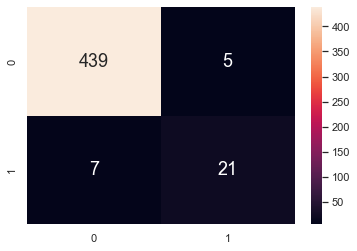

In [25]:
#test data

x = sb.heatmap(confusion_matrix(ytest, rfc_pred), annot = True, fmt = ".0f", annot_kws = {"size":18})


In [26]:
#Checking Accuracy of the Model

print ("Train Model Accuracy: ", metrics.accuracy_score(ytrain, rf.predict(xtrain)))
print ("Test Model Prediction Accuracy: ", metrics.accuracy_score(ytest, rfc_pred))

Train Model Accuracy:  1.0
Test Model Prediction Accuracy:  0.9745762711864406


From this, we can say that the accuracy of this model, using the test data is 0.9745 which is very very high. But, is it possible to get an even higher prediction accuracy?

To do that, we will first find out the variables that have a correlation with All-Star of less than 0.2. Therefore, by doing so, the aim is to create a dataframe with more accuracte and stronger correlated varaibles in a pursuit to get a better prediction accuracy

#  Building Model 2 Using Random Forest

# Finding out the Best Columns to use for Model 2

In [42]:
#Finding out the variables that have a correlation of less than 0.2 with All-Stars

relevant_features2 = cor_target[cor_target>0.2]
print(relevant_features2.head, '\n')

<bound method NDFrame.head of G           0.212267
GS          0.397897
MP          0.344354
FG          0.499682
FGA         0.482143
3P          0.302392
3PA         0.306670
2P          0.473187
2PA         0.467463
FT          0.582824
FTA         0.570977
DRB         0.391594
TRB         0.347066
AST         0.449640
STL         0.328841
BLK         0.216591
TOV         0.483782
PTS         0.527794
PER         0.298590
USG%        0.372814
WS          0.568998
BPM         0.200687
All-Star    1.000000
Name: All-Star, dtype: float64> 



As seen from this, there are a number of columns/ variables that have a correlation of less than 0.2 with All-Star. Therefore, it is not necessary to take these variables into account while determining the all-stars.

# Creating a New DataFrame with the new variables and Creating a Train-Test Split 

In [28]:
#Therefore, new dataframe with values that have a higher correlation

newplayerdata1 = playerdata.drop(['Player', 'Pos', 'Tm','Season', 'Age', 'G', 'GS'], axis = 1)

newplayerdata2 = newplayerdata1.drop(['All-Star','3P%','eFG%', '2P%', 'FT%', 'ORB', 'PF', 'TS%', 'BPM'], axis = 1)

xtrain1, xtest1, ytrain1, ytest1 = train_test_split(newplayerdata2, allstar, test_size = 0.2, random_state = 42)

print('Training newplayerdata2 Shape:', xtrain1.shape)
print('Training allstar Shape:', ytrain1.shape)
print('Testing newplayerdata2 Shape:', xtest1.shape)
print('Testing allstar Shape:', ytest1.shape)
print(newplayerdata2.info())


Training newplayerdata2 Shape: (1888, 20)
Training allstar Shape: (1888,)
Testing newplayerdata2 Shape: (472, 20)
Testing allstar Shape: (472,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360 entries, 0 to 2359
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MP      2360 non-null   float64
 1   FG      2360 non-null   float64
 2   FGA     2360 non-null   float64
 3   FG%     2360 non-null   float64
 4   3P      2360 non-null   float64
 5   3PA     2360 non-null   float64
 6   2P      2360 non-null   float64
 7   2PA     2360 non-null   float64
 8   FT      2360 non-null   float64
 9   FTA     2360 non-null   float64
 10  DRB     2360 non-null   float64
 11  TRB     2360 non-null   float64
 12  AST     2360 non-null   float64
 13  STL     2360 non-null   float64
 14  BLK     2360 non-null   float64
 15  TOV     2360 non-null   float64
 16  PTS     2360 non-null   float64
 17  PER     2360 non-null   float64
 18  USG%

In [29]:
rf1 = RandomForestClassifier(n_estimators = 100)

rf1.fit(xtrain1, ytrain1)

RandomForestClassifier()

In [30]:
rfc_pred1 = rf1.predict(xtest1)
rfc_prediction1 = rf1.predict(xtrain1)

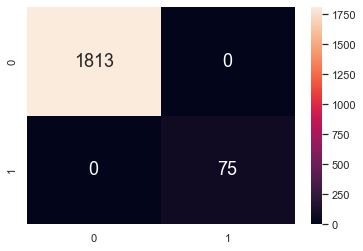

In [31]:
#showing the confusion matrix for train and test data

#train data

y = sb.heatmap(confusion_matrix(ytrain1, rfc_prediction1), annot = True, fmt = ".0f", annot_kws = {"size":18})

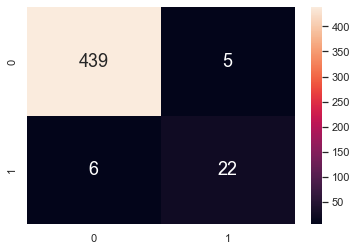

In [32]:
#test data

x = sb.heatmap(confusion_matrix(ytest1, rfc_pred1), annot = True, fmt = ".0f", annot_kws = {"size":18})

In [33]:
print ("Train Model Accuracy: ", metrics.accuracy_score(ytrain1, rf1.predict(xtrain1)))
print ("Test Prediction Accuracy: ", metrics.accuracy_score(ytest1, rfc_pred1))

Train Model Accuracy:  1.0
Test Prediction Accuracy:  0.9766949152542372


From this, we can actually see that the accuracy of Model 2 is higher than the test prediction accuracy of model 1. Therefore, we will be using model 2 to predict the all-stars for the 2021- 2022 season.


# Loading 2020-2021 NBA Player Stats and Creating Dataframe

In [36]:
#New dataset for 2020-2021 player stats

mydata = pd.read_csv('2020_2021_season.csv')
print(mydata.shape,'\n')
print(mydata.columns.to_list())
mydata

(626, 35) 

['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%', 'USG%', 'WS', 'BPM']


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,PER,TS%,USG%,WS,BPM
0,1,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,...,0.3,0.5,0.7,1.5,5.0,14.2,0.550,19.5,1.3,-4.5
1,2,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,...,0.0,0.0,0.0,0.1,0.3,-6.5,0.125,18.6,-0.1,-19.8
2,3,Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,...,0.9,0.7,1.3,1.9,7.6,15.1,0.596,11.7,4.0,-0.8
3,4,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,...,1.2,1.0,2.6,2.3,18.7,22.7,0.626,23.7,8.8,4.7
4,5,LaMarcus Aldridge,C,35,SAS,21,18,25.9,5.5,11.8,...,0.4,0.9,1.0,1.7,13.7,15.1,0.545,22.7,0.8,-1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,536,Delon Wright,PG,28,SAC,27,8,25.8,3.9,8.3,...,1.6,0.4,1.3,1.1,10.0,15.9,0.563,17.1,1.3,0.8
622,537,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,9.7,...,1.1,0.6,2.0,2.2,12.1,20.3,0.578,22.3,5.1,3.2
623,538,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,...,0.8,0.2,4.1,1.8,25.3,23.0,0.589,33.0,7.2,3.6
624,539,Cody Zeller,C,28,CHO,48,21,20.9,3.8,6.8,...,0.6,0.4,1.1,2.5,9.4,18.2,0.599,18.3,3.3,-0.3


In [37]:
#Cleaning Data

mydata.fillna(0, inplace=True)

#Making the Dataset into a list so that we can use it in Model 1

mydata2 = mydata[['MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'PER', 'USG%', 'WS']]

mydata2

,MP,FG,FGA,FG%,3P,3PA,2P,2PA,FT,FTA,DRB,TRB,AST,STL,BLK,TOV,PTS,PER,USG%,WS
0,12.1,2.0,3.7,0.544,0.0,0.0,2.0,3.7,0.9,1.8,2.2,3.4,0.5,0.3,0.5,0.7,5.0,14.2,19.5,1.3
1,2.6,0.1,1.1,0.125,0.0,0.3,0.1,0.9,0.0,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.3,-6.5,18.6,-0.1
2,27.7,3.3,5.3,0.614,0.0,0.1,3.3,5.3,1.0,2.3,5.2,8.9,1.9,0.9,0.7,1.3,7.6,15.1,11.7,4.0
3,33.5,7.1,12.5,0.570,0.0,0.1,7.1,12.4,4.4,5.5,6.7,9.0,5.4,1.2,1.0,2.6,18.7,22.7,23.7,8.8
4,25.9,5.5,11.8,0.464,1.3,3.6,4.2,8.2,1.5,1.8,3.7,4.5,1.7,0.4,0.9,1.0,13.7,15.1,22.7,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,25.8,3.9,8.3,0.462,1.2,3.1,2.6,5.3,1.1,1.3,2.9,3.9,3.6,1.6,0.4,1.3,10.0,15.9,17.1,1.3
622,24.3,5.4,9.7,0.559,0.2,0.7,5.3,9.1,1.0,1.7,3.8,6.2,4.3,1.1,0.6,2.0,12.1,20.3,22.3,5.1
623,33.7,7.7,17.7,0.438,2.2,6.3,5.6,11.3,7.7,8.7,3.3,3.9,9.4,0.8,0.2,4.1,25.3,23.0,33.0,7.2
624,20.9,3.8,6.8,0.559,0.1,0.6,3.7,6.2,1.8,2.5,4.4,6.8,1.8,0.6,0.4,1.1,9.4,18.2,18.3,3.3


In [38]:
#Making the Dataset into a list so that we can use it in Model 1


finalstats = mydata2.columns.to_list()
print(finalstats,'\n')

['MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'PER', 'USG%', 'WS'] 



#  Combining this Dataset with Model 2 

In [39]:
#Now we shall put this dataset into our model 1 

pred = rf1.predict(mydata2[finalstats])

print(pred)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [40]:
#Inserting back the All-Star column into the Dataset

mydata['All-Star'] = pred.tolist()

print(mydata)

      Rk             Player Pos  Age   Tm   G  GS    MP   FG   FGA  ...  BLK  \
0      1   Precious Achiuwa  PF   21  MIA  61   4  12.1  2.0   3.7  ...  0.5   
1      2       Jaylen Adams  PG   24  MIL   7   0   2.6  0.1   1.1  ...  0.0   
2      3       Steven Adams   C   27  NOP  58  58  27.7  3.3   5.3  ...  0.7   
3      4        Bam Adebayo   C   23  MIA  64  64  33.5  7.1  12.5  ...  1.0   
4      5  LaMarcus Aldridge   C   35  SAS  21  18  25.9  5.5  11.8  ...  0.9   
..   ...                ...  ..  ...  ...  ..  ..   ...  ...   ...  ...  ...   
621  536       Delon Wright  PG   28  SAC  27   8  25.8  3.9   8.3  ...  0.4   
622  537     Thaddeus Young  PF   32  CHI  68  23  24.3  5.4   9.7  ...  0.6   
623  538         Trae Young  PG   22  ATL  63  63  33.7  7.7  17.7  ...  0.2   
624  539        Cody Zeller   C   28  CHO  48  21  20.9  3.8   6.8  ...  0.4   
625  540        Ivica Zubac   C   23  LAC  72  33  22.3  3.6   5.5  ...  0.9   

     TOV   PF   PTS   PER    TS%  USG% 

In [41]:
#Removing all Non-All Stars and printing out only the All-Stars predicted by the model

yesallstar = mydata[mydata['All-Star'] == 1]
print (yesallstar)

      Rk                 Player Pos  Age   Tm   G  GS    MP    FG   FGA  ...  \
3      4            Bam Adebayo   C   23  MIA  64  64  33.5   7.1  12.5  ...   
14    12  Giannis Antetokounmpo  PF   26  MIL  61  61  33.0  10.3  18.0  ...   
41    38           Bradley Beal  SG   27  WAS  60  60  35.8  11.2  23.0  ...   
95    84           Jimmy Butler  SF   31  MIA  52  52  33.6   7.0  14.2  ...   
134  116          Stephen Curry  PG   32  GSW  63  63  34.2  10.4  21.7  ...   
151  130            Luka Dončić  PG   21  DAL  66  66  34.3   9.8  20.5  ...   
162  140           Kevin Durant  PF   32  BRK  35  32  33.1   9.3  17.2  ...   
168  146            Joel Embiid   C   26  PHI  51  51  31.1   9.0  17.6  ...   
198  173            Paul George  SF   30  LAC  54  54  33.7   8.2  17.6  ...   
229  200           James Harden  SG   31  HOU   8   8  36.3   7.5  16.9  ...   
230  200           James Harden  PG   31  BRK  36  35  36.6   7.8  16.6  ...   
279  242         Brandon Ingram  SF   23

# The All-Stars Obtained from this Model are: 

1. Giannis Antentokounmpo
2. Bradley Beal
3. Jaylen Brown
4. Jimmy Butler
5. Stephen Curry
6. Anthony Davis
7. Luka Doncic
8. Kevin Durant
9. Joel Embiid
10. Paul George
11. James Harden
12. Brandon Ingram
13. Kyrie Irving
14. Lebron James
15. Nikola Jokic
16. Zach Lavine
17. Kawhi Leonard
18. Damian Lillard
19. Donovan Mitchell
20. Julius Randle
21. Domantas Sabonis
22. Jayson Tatum
23. Karl-Anthony Towns
24. Nikola Vucevic
25. Russell Westbrook
26. Zion Williamson
27. Trae Young

# The Actual All-Stars of the 2020-2021 Season are:

1. Kevin Durant
2. Lebron James
3. Giannis Antetokounmpo
4. Stephen Curry
5. Luka Doncic
6. Nikola Jokic
7. Jaylen Brown
8. Paul George
9. Rudy Gobert
10. Damian Lillard
11. Chris Paul
12. Domantas Sabonis
13. Ben Simmons
14. Bradley Beal
15. Joel Embiid
16. Kyrie Irving
17. Kawhi Leonard
18. Jayson Tatum
19. Devin Booker
20. Anthony Davis
21. James Harden
22. Zach Lavine
23. Donovan Mitchell
24. Julius Randle
25. Nikola Vucevic
26. Zion Williamson
27. Mike Conley


As seen from above, the predictions made by the model was quite accurate.

Some of the players shown in the model but not chosen in reality are:
1. Jimmy Butler
2. Karl-Anthony Towns
3. Brandon Ingram
4. Russell Westbrook
5. Trae Young
6. Bam Adebayo

Some of the players not shown in the model are:

1. Rudy Gobert
2. Chris Paul
3. Ben Simmons
4. Jaylen Brown
5. Devin Booker - He was selected as a replacement for Anthony Davis, who was out due to injury
6. Mike Conley - He was selected as a replacement for Devin Booker, who was out due to injury




Therefore, from this analysis, we found that variables such as Total Points, Assists, Rebounds and Win Shares played a large role in affecting the prediction of whether a player becomes an All-Star. Moreover, out of these variables, Win Shares was shown to be the most effective with a correlation with All-Star of 0.52. 

Thus, it was possible to create a model using Random Forest to predict the all-stars for a different season.